# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/data/airbnb_hw.csv')
df_clean = df.copy() #Never edit the original, always copy
df_clean["Price"] = df_clean["Price"].str.replace(",", "") #This is replacing the comma from the string with a zero space because when there is a comma present in the value python treats it as a string and not an integer
df_clean["Price"] = pd.to_numeric(df_clean["Price"]) #This then is pushing the strings to integers, so then you can apply math functions to this column
df_clean["Price"].isna().sum() #Making sure there are no NAs in this column, from the output there aren't any
df_clean["Price"].unique()

df2 = pd.read_csv('/data/mn_police_use_of_force.csv')
df_clean2 = df2.copy()
missing_count = df_clean2['subject_injury'].isna().sum()
total_count = len(df_clean2["subject_injury"])
missing_proportion = missing_count / total_count
print(missing_proportion) # From the output of this, it shows that 76% of the data is missing, therefore this is concerning given the size of the data
crosstab = pd.crosstab(df_clean2['subject_injury'], df_clean2['force_type'], dropna= False)
print(crosstab) #The data seems to be missing on a much larger scale when there is a bodily force, chemical irritant, or taser involved. In some cases, even there is no data present for the type of force, as less lethal or maximal restraint technique

df3 = pd.read_parquet('/data/justice_data.parquet')
df_clean3 = df3.copy()
df_clean3['WhetherDefendantWasReleasedPretrial'] = df_clean3['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan) # The unique values were 9,0, and 1 therefore by replacing the 9 which is a placeholder for NA, then there are 3 values with NA.
df_clean3['WhetherDefendantWasReleasedPretrial'].unique()
df_clean3['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()

mask = df_clean3['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([0, 1, 4, 9])
df_clean3.loc[mask, 'ImposedSentenceAllChargeInContactEvent'] = np.nan
df_clean3['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df_clean3['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
df_clean3['ImposedSentenceAllChargeInContactEvent'] = df_clean3['ImposedSentenceAllChargeInContactEvent'].round() #I rounded these values so that I would be able to then change them to integers for them to look like more manageble numbers that might relate to their bond
df_clean3['ImposedSentenceAllChargeInContactEvent'] = df_clean3['ImposedSentenceAllChargeInContactEvent'].astype('Int64')
df_clean3['ImposedSentenceAllChargeInContactEvent'].unique() #My thought process is from the codebook, the numbers 0,1,4, and 9 do not have numbers where the bond can be described, therefore if we can omit, these values to NaN, then we are left with only the bond numbers, where there is a secured bond.

0.7619342359767892
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                                  2                            0   
NaN            

<IntegerArray>
[<NA>,   60,  120,   96,   44,  132,   48,   12,  258,  106,
 ...
  165,  175,  181,  121,  152,   69,   26,  960,  116,   20]
Length: 161, dtype: Int64

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

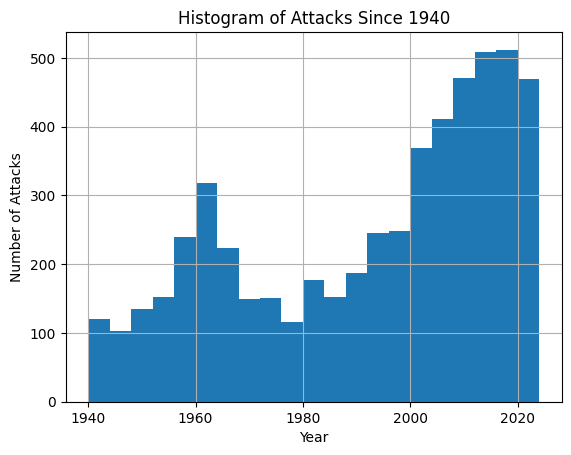

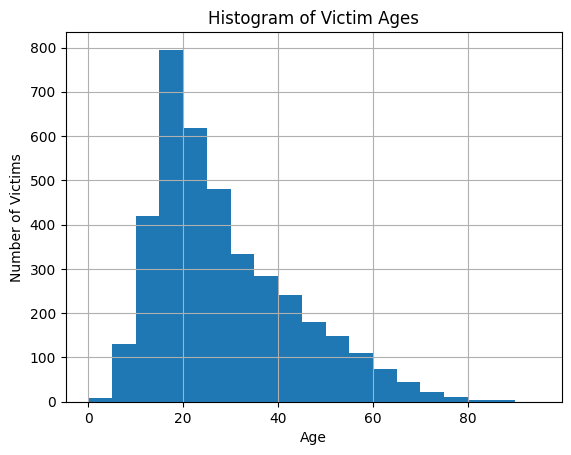

0.8737428438805508
0.7380005680204488
Type  Provoked   Unknown  Unprovoked
Sex                                 
F     0.038462  0.114144    0.847395
M     0.097311  0.133935    0.768754
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.953198  0.014041  0.032761
Unknown     0.372924  0.460963  0.166113
Unprovoked  0.742159  0.015201  0.242640
Fatal Y/N         N   Unknown         Y
Sex                                    
F          0.761787  0.086849  0.151365
M          0.697275  0.081387  0.221338
0.10096563476285146


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df4 = pd.read_excel('/data/GSAF5.xls')
df4_clean = df4.copy()
df4_clean = df4_clean.drop(["Unnamed: 21", "Unnamed: 22"], axis = 1)
df4_clean.head()

df4_clean['Year'] = pd.to_numeric(df4_clean['Year'], errors='coerce').astype("Int64")
df4_clean.loc[df4_clean['Year'] < 1940, 'Year'] = np.nan
df_attacks = df4_clean[(df4_clean['Year'] >= 1940)] #The range of values in the years go back to the 1500s, with some values that are not years that need to be converted to NaN


df_attacks['Year'].hist(bins=range(1940, 2026, 4))
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Histogram of Attacks Since 1940")
plt.show() #The histogram shows that since 1940 the number of shark attacks has overal increased over time

df4_clean['Age'] = pd.to_numeric(df4_clean['Age'], errors='coerce').astype("Int64")
df4_clean['Age'].unique()

df4_clean['Age'].hist(bins=range(0, 100, 5))
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.title('Histogram of Victim Ages')
plt.show()

Number_Males = df4_clean.loc[df4_clean['Sex'] == 'M', 'Sex'].count()
Total_Victims = df4_clean['Sex'].count()
Proportion_Males = Number_Males / Total_Victims
print(Proportion_Males) #The proportion of victims that are male is around 0.87 or 87%.

df4_clean['Type'] = df4_clean['Type'].str.strip().str.capitalize()
df4_clean['Type'] = df4_clean['Type'].where(df4_clean['Type'].isin(['Provoked', 'Unprovoked']), 'Unknown')

total_attacks = len(df4_clean['Type'])
unprovoked_count = (df4_clean['Type'] == 'Unprovoked').sum()
unprovoked_proportion = unprovoked_count / total_attacks
print(unprovoked_proportion) #The proportion of attacks that are unprovoked is around 0.73 or 73%.

df4_clean['Fatal Y/N'] = df4_clean['Fatal Y/N'].str.strip().str.capitalize()
df4_clean['Fatal Y/N'] = df4_clean['Fatal Y/N'].where(df4_clean['Fatal Y/N'].isin(['Y', 'N']), 'Unknown')

df4_clean['Sex'] = df4_clean['Sex'].str.strip().str.upper()
df4_clean['Sex'] = df4_clean['Sex'].where(df4_clean['Sex'].isin(['M', 'F']), np.nan)

gender_type_counts = pd.crosstab(df4_clean['Sex'], df4_clean['Type'])
gender_type_props = gender_type_counts.div(gender_type_counts.sum(axis=1), axis=0)
print(gender_type_props) #Sharks are more likely to attack on males at around 0.13 instead of 0.11, which is 2% higher than females.

type_fatal_counts = pd.crosstab(df4_clean['Type'], df4_clean['Fatal Y/N'])
type_fatal_props = type_fatal_counts.div(type_fatal_counts.sum(axis=1), axis=0)
print(type_fatal_props) #It is more likely to be fatal when when the attack is unprovoked at 0.24 or 24%.

gender_fatal_counts = pd.crosstab(df4_clean['Sex'], df4_clean['Fatal Y/N'])
gender_fatal_props = gender_fatal_counts.div(gender_fatal_counts.sum(axis=1), axis=0)
print(gender_fatal_props) #It is more likely to be fatal when it is a male at 0.22 or 22%.

#I think sharks are pretty cool, but they are definitely very dangerous creatures that when in the water can attack whenever

df4_clean = df4_clean.rename(columns={'Species ': 'Species'})
df4_clean['Species'].unique()
df4_clean['Species'] = df4_clean['Species'].str.lower().str.strip()
species_words = df4_clean['Species'].str.split()
is_white_shark = species_words.apply(lambda words: 'white' in words if isinstance(words, list) else False)
proportion_white_shark = is_white_shark.sum() / len(df4_clean)
print(proportion_white_shark) #Only around 0.10 or 10% of the sharks in attacks are white sharks.